# 交叉验证法
## 基本思想
将原始数据进行分组，一部分做为训练集来训练模型，另一部分做为测试集来评价模型。<br/>
## 优点
 1.交叉验证用于评估模型的预测性能，尤其是训练好的模型在新数据上的表现，可以在一定程度上减小过拟合。<br/>
 2.还可以从有限的数据中获取尽可能多的有效信息。<br/>
k折交叉验证法：k 折交叉验证通过对 k 个不同分组训练的结果进行平均来减少方差，因此模型的性能对数据的划分就不那么敏感。<br/>
## 步骤
（1）不重复抽样将原始数据随机分为 k 份。<br/>
（2）每一次挑选其中 1 份作为测试集，剩余 k-1 份作为训练集用于模型训练。<br/>
（3）重复第二步 k 次，这样每个子集都有一次机会作为测试集，其余机会作为训练集。在每个训练集上训练后得到一个模型，用这个模型在相应的测试集上测试，计算并保存模型的评估指标。<br/>
（4）计算 k 组测试结果的平均值作为模型精度的估计，并作为当前 k 折交叉验证下模型的性能指标。

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('wdbc.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


数据的前两列分别存储了样本唯一的ID以及样的诊断结果（M代表恶性，B代表良性）。数据集的2~31列包含了30个从细胞核照片中提取、用实数值标识的特征，它们可以用于构建判定模型，对肿瘤是良性还是恶性做出预测。

In [2]:
from sklearn.preprocessing import LabelEncoder
X=df.loc[:,2:].values
Y=df.loc[:,1].values
le=LabelEncoder()#将字符串转换为整数
Y=le.fit_transform(Y)

In [3]:
from sklearn import cross_validation
X_train,X_test,Y_train,Y_test=\
cross_validation.train_test_split(X,Y,test_size=0.15,random_state=1)

D:\Python\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe_lr=Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=2)),('clf',LogisticRegression(random_state=1))])
pipe_lr.fit(X_train,Y_train)
print('Test Accuracy:%.3f'%pipe_lr.score(X_test,Y_test))

Test Accuracy:0.942


In [5]:
pipe_lr.fit

<bound method Pipeline.fit of Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])>

K折交叉验证法：<br/>
不重复地随机讲训练数据集划分为k个，其中k-1个用于模型训练，剩余一个用于测试。重复此过程k次，得到k个模型及对模型性能的评价。

In [6]:
from sklearn.cross_validation import StratifiedKFold
kfold=StratifiedKFold(Y_train,n_folds=10,random_state=1)
scores=[]
for k,(train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train],Y_train[train])
    score=pipe_lr.score(X_train[test],Y_train[test])
    scores.append(score)
    print('Fold:%s,Class dist.:%s,Acc:%.6f'%(k+1,np.bincount(Y_train[train]),score))

Fold:1,Class dist.:[274 160],Acc:0.959184
Fold:2,Class dist.:[274 160],Acc:0.938776
Fold:3,Class dist.:[274 160],Acc:0.959184
Fold:4,Class dist.:[274 160],Acc:0.918367
Fold:5,Class dist.:[274 160],Acc:0.959184
Fold:6,Class dist.:[275 160],Acc:0.958333
Fold:7,Class dist.:[275 160],Acc:0.937500
Fold:8,Class dist.:[275 160],Acc:0.958333
Fold:9,Class dist.:[275 161],Acc:0.978723
Fold:10,Class dist.:[275 161],Acc:0.957447


In [7]:
print('CV accuracy:%.3f+/-%.3f'%(np.mean(scores),np.std(scores)))

CV accuracy:0.953+/-0.016


In [8]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [9]:
np.bincount(np.arange(5))

array([1, 1, 1, 1, 1], dtype=int64)

In [10]:
np.bincount(np.array([0, 1, 1, 3, 2, 1, 7]))

array([1, 3, 1, 1, 0, 0, 0, 1], dtype=int64)

In [11]:
w = np.array([0.3, 0.5, 0.2, 0.7, 1, -0.6]) # weights
x = np.array([0, 1, 1, 2, 2, 2])
np.bincount(x,weights=w)

array([0.3, 0.7, 1.1])

In [12]:
from sklearn.cross_validation import cross_val_score
scores=cross_val_score(estimator=pipe_lr,X=X_train,y=Y_train,cv=10,n_jobs=1)
print('CV accuracy scores:%s'%scores)

CV accuracy scores:[0.95918367 0.93877551 0.95918367 0.91836735 0.95918367 0.95833333
 0.9375     0.95833333 0.9787234  0.95744681]


In [13]:
print('CV accuracy scores:%.3f +/- %.3f'%(np.mean(scores),np.std(scores)))

CV accuracy scores:0.953 +/- 0.016


In [14]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
pipe_lr=Pipeline([('scl',StandardScaler()),('clf',LogisticRegression(random_state=1))])
train_sizes,train_scores,test_scores=\
          learning_curve(estimator=pipe_lr,
                         X=X_train,
                         y=Y_train,
                         train_sizes=np.linspace(0.1,1,10),
                         cv=10,
                         n_jobs=1)

D:\Python\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


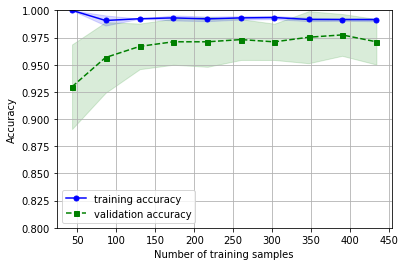

In [15]:
train_mean=np.mean(train_scores,axis=1)#axis=1，求行均值
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
#color：颜色；marker：形状；markersize：形状的大小；label：标签
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
#fill_between函数加入了平均准确率标准差的信息，用以表示评价结果的方差
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.ylim([0.8,1.0])
plt.show()